In [380]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
df = pd.read_csv("Credit_card.csv")
df_label = pd.read_csv("Credit_card_label.csv")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [382]:
df_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [383]:
merged_df = pd.merge(df, df_label, on="Ind_ID", how="inner")
merged_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [384]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [385]:
merged_df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

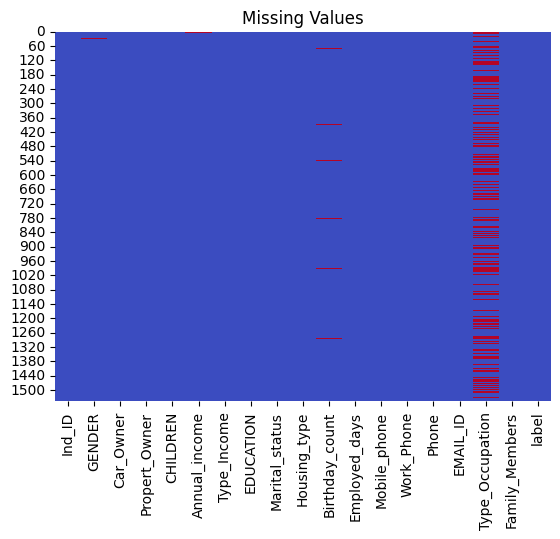

In [386]:
sns.heatmap(merged_df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

In [387]:
merged_df.loc[(merged_df['Employed_days'] > 0) & (merged_df['Type_Occupation'].isna()), 'Type_Occupation'] = 'unemployed'

merged_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,unemployed,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [388]:
merged_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    227
Family_Members       0
label                0
dtype: int64

In [389]:
merged_df['Annual_income'] = merged_df['Annual_income'].interpolate(method='linear', limit_direction='forward',axis=0)
merged_df['Birthday_count'] = merged_df['Birthday_count'].interpolate(method='linear', limit_direction='forward',axis=0)
merged_df['Type_Occupation'] = merged_df['Type_Occupation'].fillna(df['Type_Occupation'].mode()[0])
merged_df['GENDER'] = merged_df['GENDER'].fillna(df['GENDER'].mode()[0])
merged_df.isnull().sum()


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [390]:
merged_df.label.value_counts()

label
0    1373
1     175
Name: count, dtype: int64

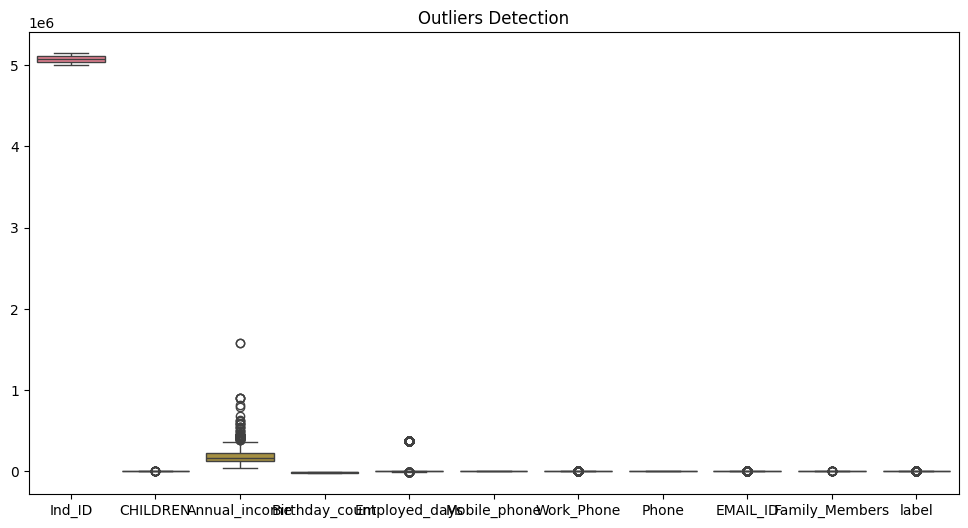

In [391]:
plt.figure(figsize=(12,6))
sns.boxplot(merged_df)
plt.title('Outliers Detection')
plt.show()

In [392]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('label', errors='ignore')

# Calculate the IQR for each numeric column
Q1 = merged_df[numeric_columns].quantile(0.25)
Q3 = merged_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((merged_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (merged_df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Remove rows with any outliers
merged_df = merged_df[~outliers.any(axis=1)]

# Verify that the outliers were removed
merged_df.label.value_counts()

label
0    676
1     75
Name: count, dtype: int64

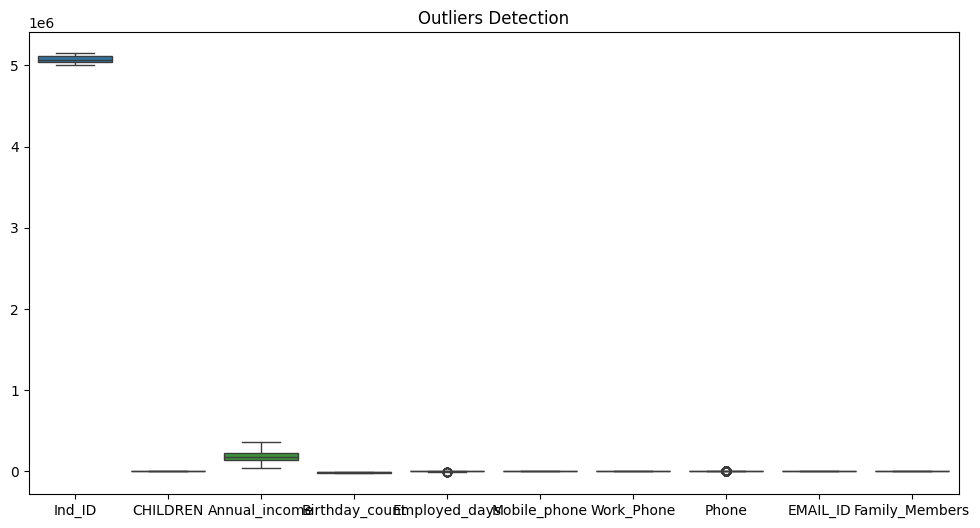

In [393]:
plt.figure(figsize=(12,6))
sns.boxplot(merged_df[numeric_columns])
plt.title('Outliers Detection')
plt.show()

In [394]:
col_c = merged_df.select_dtypes(include=['object'])
col_c.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')

In [395]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in col_c.columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])
merged_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
15,5021310,1,0,1,0,270000.0,3,4,1,1,-16896.0,-248,1,0,0,0,7,2,1
16,5021314,1,0,1,0,270000.0,3,4,3,1,-16896.0,-248,1,0,0,0,7,2,1
17,5021430,0,0,1,0,126000.0,0,1,3,1,-18907.0,-2470,1,0,0,0,13,1,1
18,5021431,0,0,1,0,126000.0,0,1,3,1,-18907.0,-2470,1,0,0,0,13,1,1
20,5022053,1,0,0,0,202500.0,3,1,3,1,-12811.0,-4327,1,0,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,1,0,1,360000.0,2,4,1,1,-11294.0,-3536,1,0,1,0,4,3,0
1543,5028645,0,0,1,0,292500.0,0,1,1,1,-11957.0,-2182,1,0,0,0,9,2,0
1544,5023655,0,0,0,0,225000.0,0,2,3,1,-10229.0,-1209,1,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,3,1,1,1,-13174.0,-2477,1,0,0,0,9,4,0


In [396]:
merged_df.label.value_counts()

label
0    676
1     75
Name: count, dtype: int64

In [397]:
from imblearn.over_sampling import SMOTE
from collections import Counter
x= merged_df.drop(['label'],axis=1)
y= merged_df['label']
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

merged_df = pd.concat([df_sampled,y_sampled],axis=1)

In [398]:
merged_df.label.value_counts()

label
1    676
0    676
Name: count, dtype: int64

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14744\2064560141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GENDER", y="Count", data=gender_counts, palette="pastel")


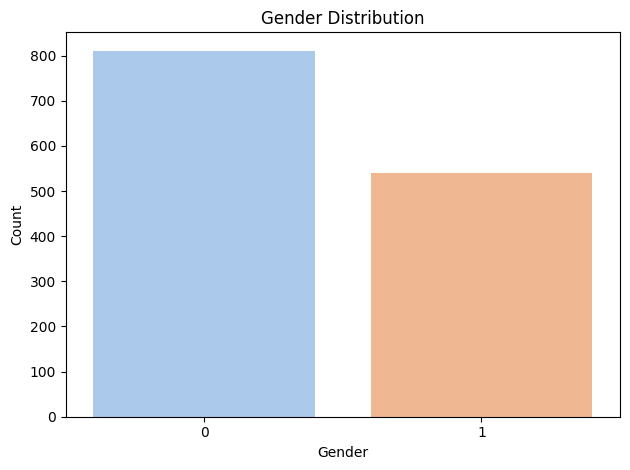

In [399]:
gender_counts = merged_df["GENDER"].value_counts().reset_index()
gender_counts.columns = ["GENDER", "Count"]

sns.barplot(x="GENDER", y="Count", data=gender_counts, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()

plt.show()


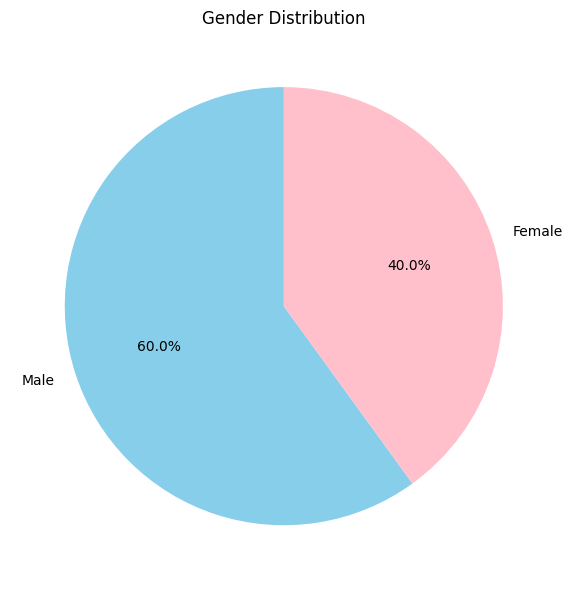

In [400]:
gender_counts = merged_df["GENDER"].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "pink"], labels=["Male", "Female"])
plt.title("Gender Distribution")
plt.ylabel("") 
plt.tight_layout()

plt.show()


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14744\939403786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Count", data=label_counts, palette="Set2")


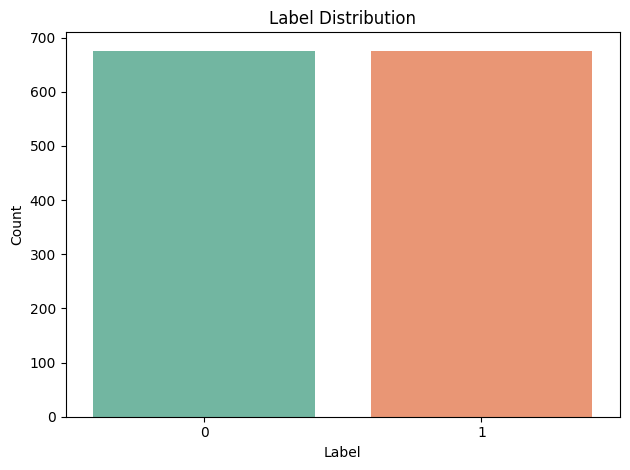

In [401]:
label_counts = merged_df["label"].value_counts().reset_index()
label_counts.columns = ["Label", "Count"]

sns.barplot(x="Label", y="Count", data=label_counts, palette="Set2")

plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()

plt.show()


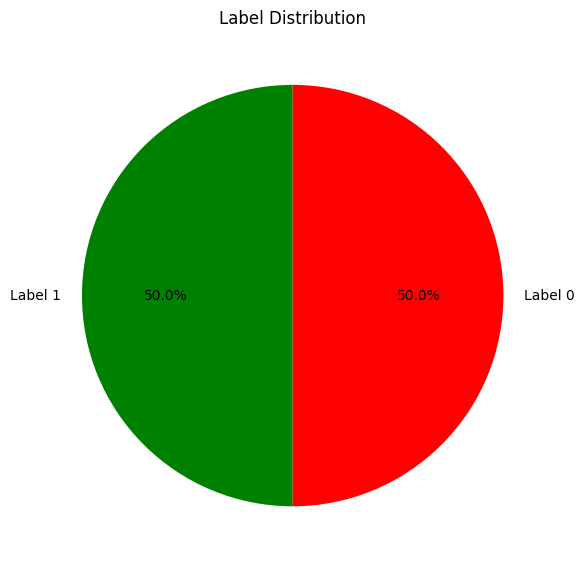

In [402]:
label_counts = merged_df["label"].value_counts()

plt.figure(figsize=(6, 6))
label_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green", "red"], labels=["Label 1", "Label 0"])

# Customize the plot
plt.title("Label Distribution")
plt.ylabel("") 
plt.tight_layout()

# Show the plot
plt.show()


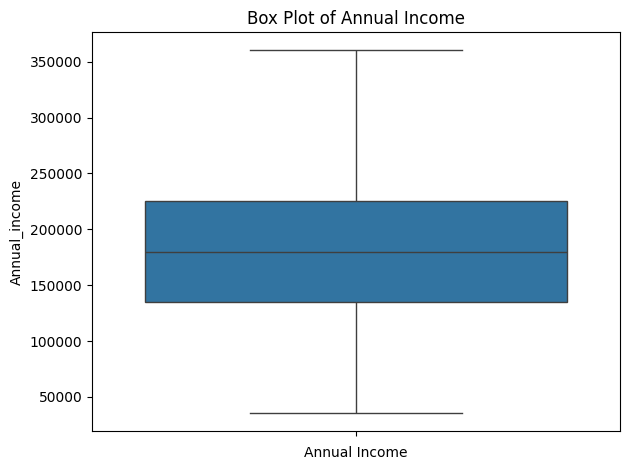

In [403]:
import seaborn as sns

sns.boxplot(y=merged_df["Annual_income"])

plt.title("Box Plot of Annual Income")
plt.xlabel("Annual Income")
plt.tight_layout()

plt.show()


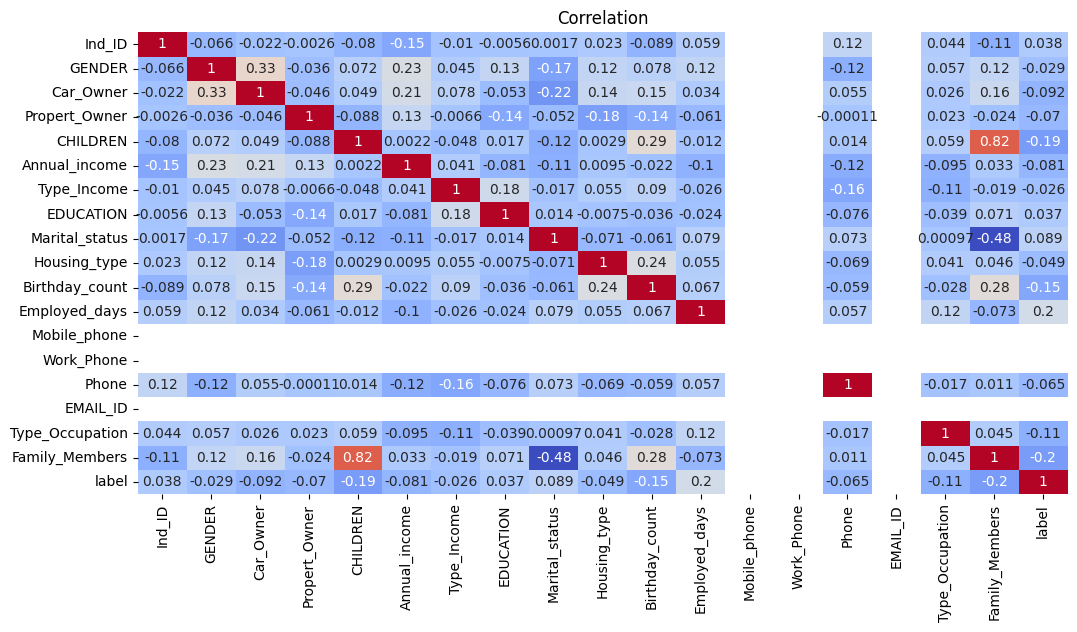

In [404]:
plt.figure(figsize=(12,6))
sns.heatmap(merged_df.corr(), cmap='coolwarm', cbar=False, annot=True)
plt.title('Correlation')
plt.show() 

In [405]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x= merged_df.drop(['label'],axis=1)
y=merged_df['label']
Scaler.fit(x)
x_scaled = Scaler.transform(x)

In [406]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
y.value_counts()

label
1    676
0    676
Name: count, dtype: int64

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(),x_scaled,y,cv=cv).mean()

0.6324723247232473

In [408]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Define models
models = {
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [409]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


In [410]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
LR = LogisticRegression(C= 1, fit_intercept= True, l1_ratio = 0.1, penalty= 'l1', solver = 'saga')
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)
accuracy_score(y_test,LR_pred)


c:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


0.6494464944649446

In [411]:
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9003690036900369

In [412]:
svc_pred = svc.predict(x_test)


In [413]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)


0.8671586715867159

In [414]:
KNN_pred = KNN.predict(x_test)


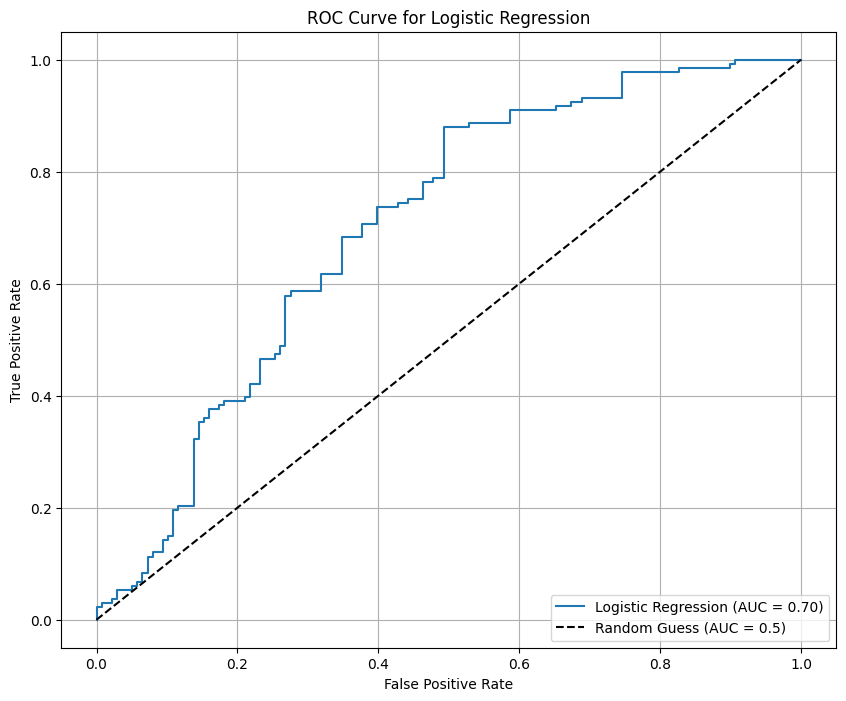

Overall ROC AUC for Logistic Regression: 0.7020


In [415]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_score = LR.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Logistic Regression: {roc_auc:.4f}")

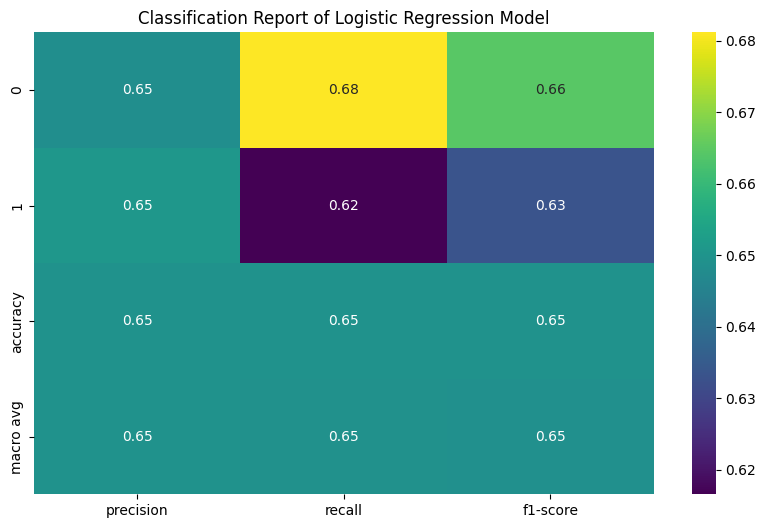

In [416]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()


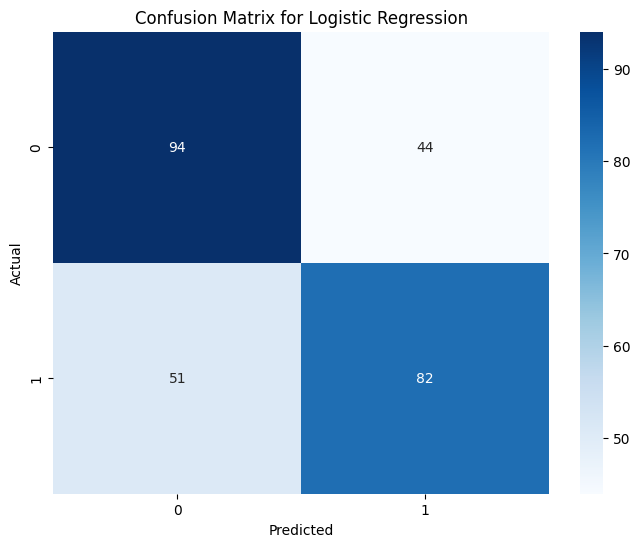

In [417]:
y_test_pred = LR.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

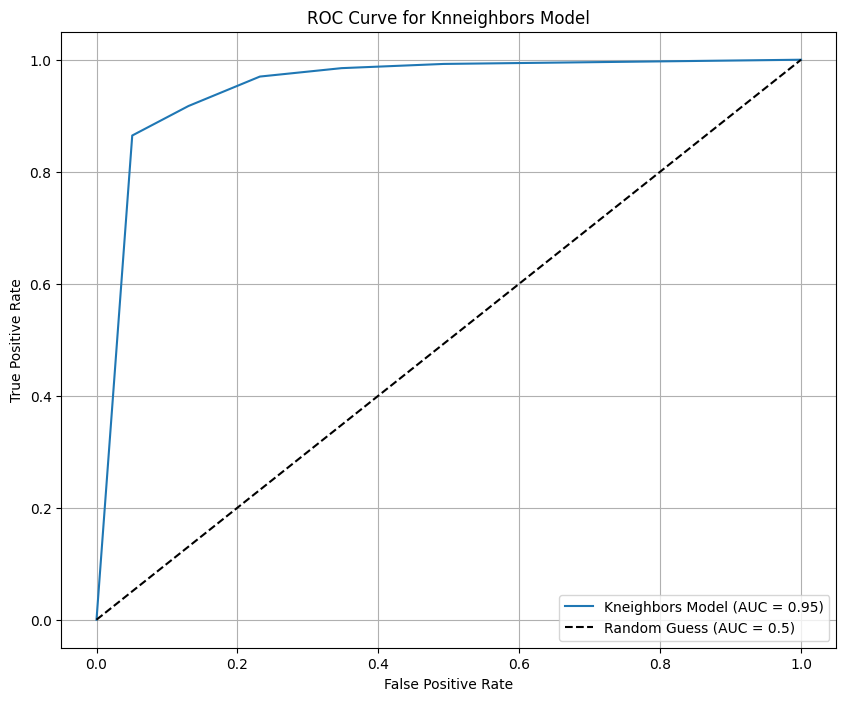

Overall ROC AUC for Kneighbors Model: 0.9506


In [418]:
y_score = KNN.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Kneighbors Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Knneighbors Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Kneighbors Model: {roc_auc:.4f}")


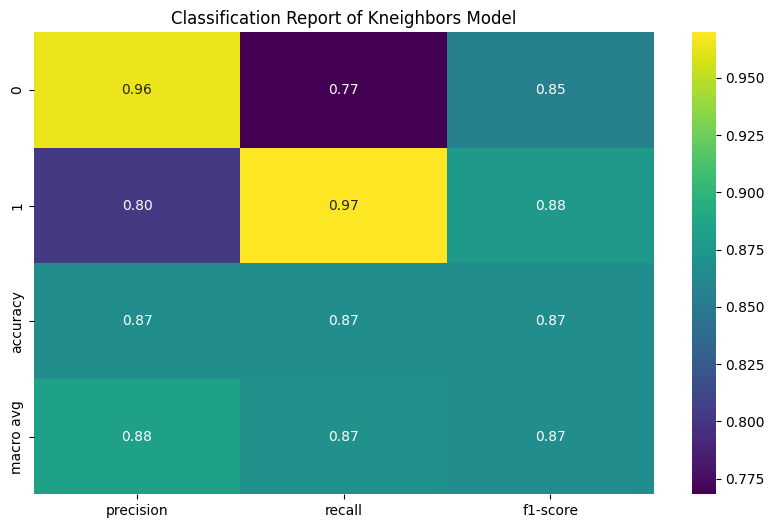

In [419]:
KN_report = classification_report(y_test, KNN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Model")
plt.show()

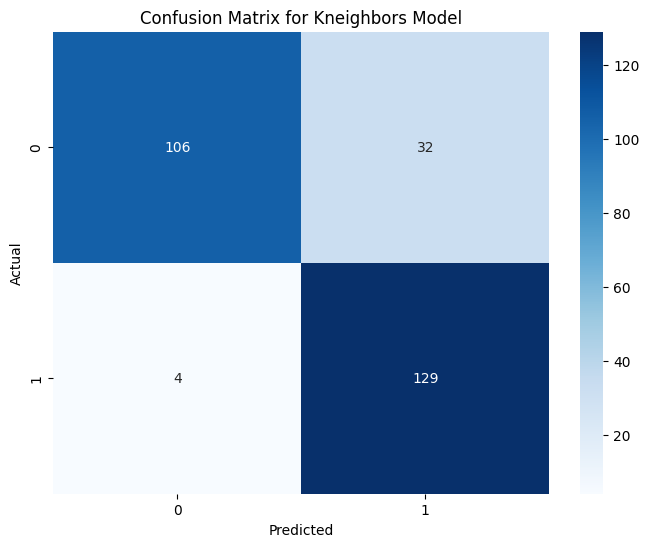

In [420]:
y_test_pred = KNN.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Kneighbors Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

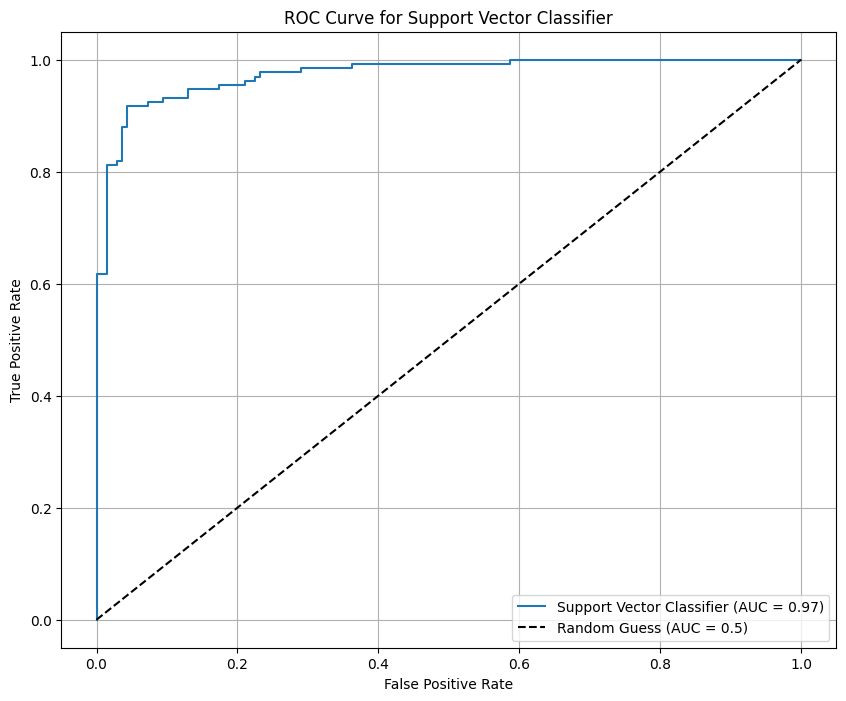

Overall ROC AUC for Support Vector Classifier Model: 0.9743


In [421]:
y_score = svc.decision_function(x_test)  # Decision function outputs for binary classification

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Support Vector Classifier (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Support Vector Classifier Model: {roc_auc:.4f}")


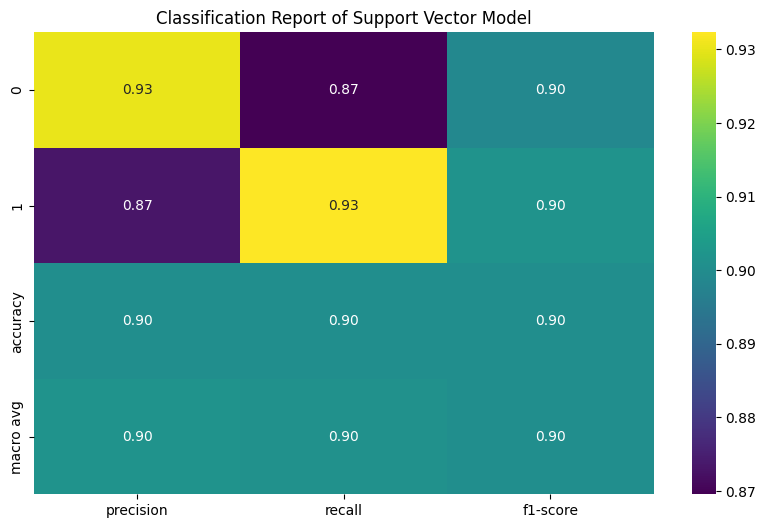

In [422]:
SVC_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
SVC_report_df = pd.DataFrame(SVC_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(SVC_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Support Vector Model")
plt.show()

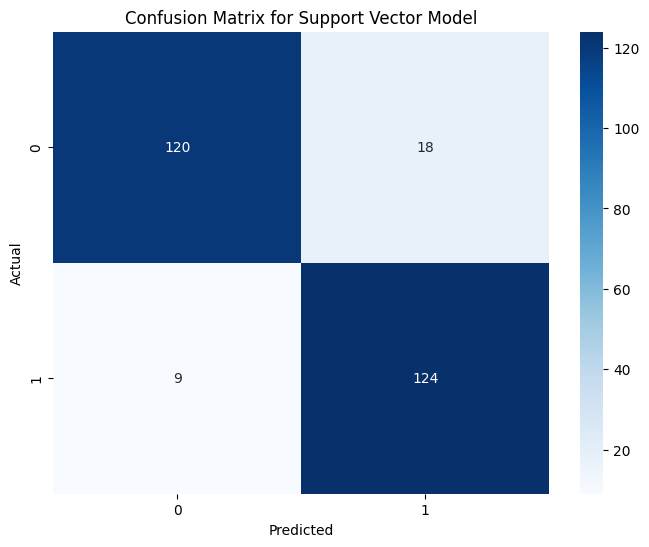

In [423]:
y_test_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Support Vector Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14744\996243140.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


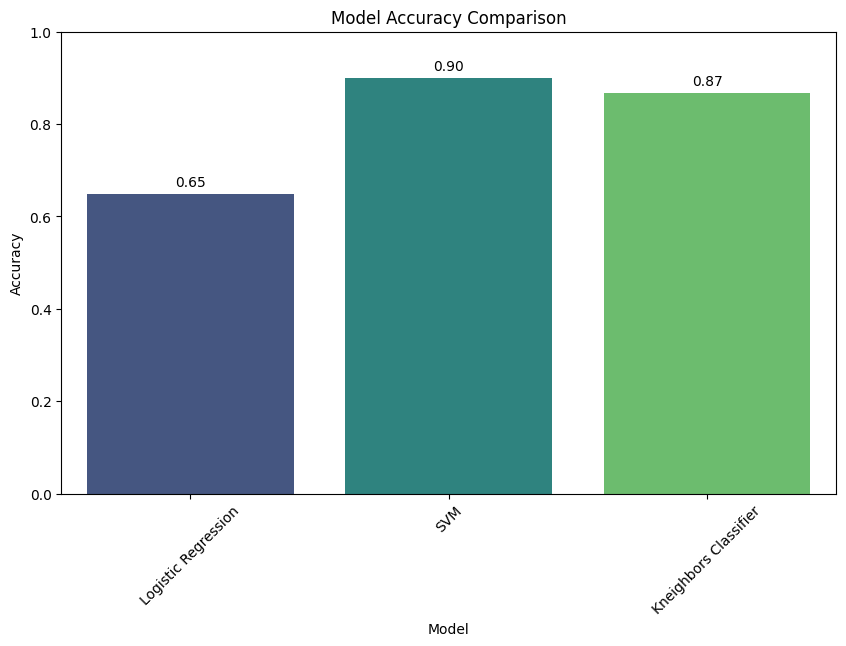

In [424]:
models = {
    'Logistic Regression': LR,
    'SVM': svc,
    'Kneighbors Classifier': KNN,
}

accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()